# Exploratory Data Analysis (EDA) and Preprocessing

In this lecture, we will perform an in-depth Exploratory Data Analysis (EDA) on a noisy dataset from the UCI repository (Airfoil Self-Noise). We'll cover data loading, inspection, cleaning, handling missing values and outliers, feature engineering, visualization, and correlation analysis.


In [25]:
import warnings
warnings.simplefilter(action='ignore')

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For outlier detection
from scipy.stats import zscore

# Enable inline plotting
%matplotlib inline

# Set Seaborn style for better visuals
sns.set(style="whitegrid")

## Loading the Dataset

We'll use the Airfoil Self-Noise dataset from UCI. This dataset contains aerodynamic and acoustic test data for airfoil blade sections. It has 1,503 samples with 6 attributes:
- Frequency (Hz)
- Angle of attack (degrees)
- Chord length (meters)
- Free-stream velocity (m/s)
- Suction side displacement thickness (meters)
- Scaled sound pressure level (dB) [Target variable]


In [27]:
# Load the dataset
# Updated URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat'
column_names = ['Frequency', 'Angle_of_Attack', 'Chord_Length', 'Free_Stream_Velocity',
                'Suction_Side_Displacement_Thickness', 'Sound_Pressure_Level']
df = pd.read_csv(url, sep='\t', header=None, names=column_names)

# Display the first few rows
print("First five rows of the dataset:")
display(df.head())

First five rows of the dataset:


,Frequency,Angle_of_Attack,Chord_Length,Free_Stream_Velocity,Suction_Side_Displacement_Thickness,Sound_Pressure_Level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


## Initial Data Inspection

Let's inspect the dataset's structure, data types, and check for missing values.


In [28]:
# Inspect the dataset
print("Dataset Info:")
print(df.info())

print("\nDescriptive Statistics:")
display(df.describe())

print("\nMissing Values Per Column:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Frequency                            1503 non-null   int64  
 1   Angle_of_Attack                      1503 non-null   float64
 2   Chord_Length                         1503 non-null   float64
 3   Free_Stream_Velocity                 1503 non-null   float64
 4   Suction_Side_Displacement_Thickness  1503 non-null   float64
 5   Sound_Pressure_Level                 1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB
None

Descriptive Statistics:


,Frequency,Angle_of_Attack,Chord_Length,Free_Stream_Velocity,Suction_Side_Displacement_Thickness,Sound_Pressure_Level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000



Missing Values Per Column:
Frequency                              0
Angle_of_Attack                        0
Chord_Length                           0
Free_Stream_Velocity                   0
Suction_Side_Displacement_Thickness    0
Sound_Pressure_Level                   0
dtype: int64


## Data Visualization: Univariate Analysis

We begin by visualizing the distribution of each feature to understand its range and detect potential anomalies.


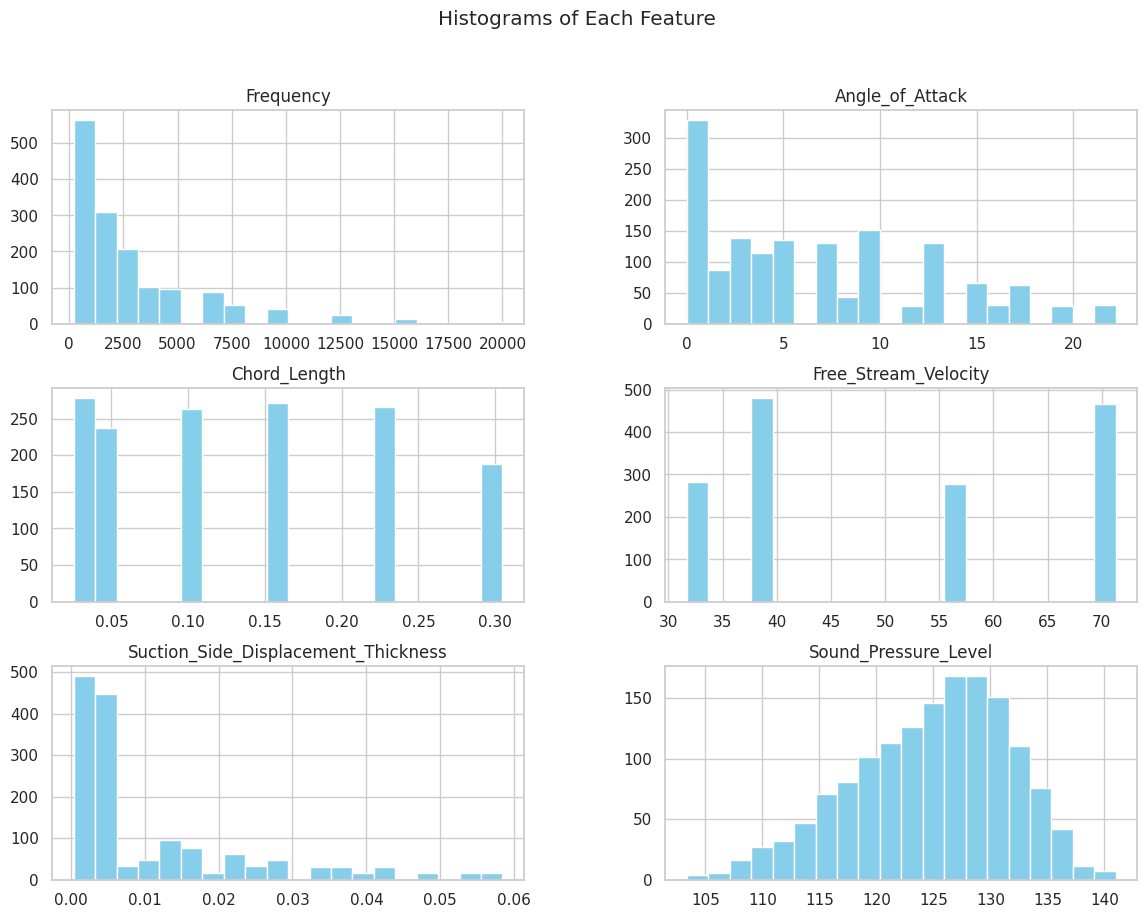

In [29]:
# Histograms for each feature
df.hist(bins=20, figsize=(14,10), color='skyblue')
plt.suptitle('Histograms of Each Feature')
plt.show()


## Data Visualization: Boxplots

Boxplots help in identifying outliers in the dataset.


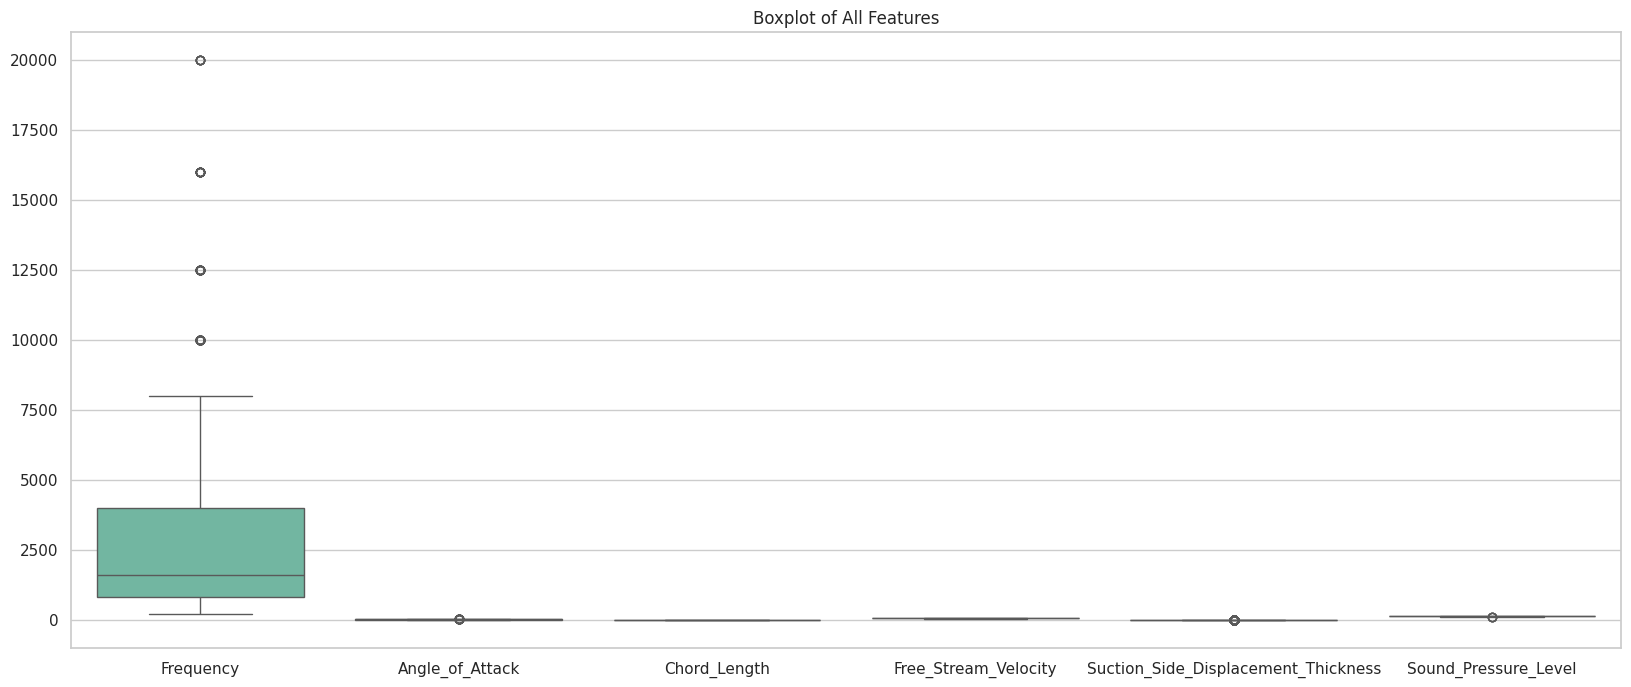

In [30]:
# Boxplots for all features
plt.figure(figsize=(20,8))
sns.boxplot(data=df, palette='Set2')
plt.title('Boxplot of All Features')
plt.show()


## Bivariate and Multivariate Analysis

We now explore relationships between features and the target variable using scatter plots and pairplots.


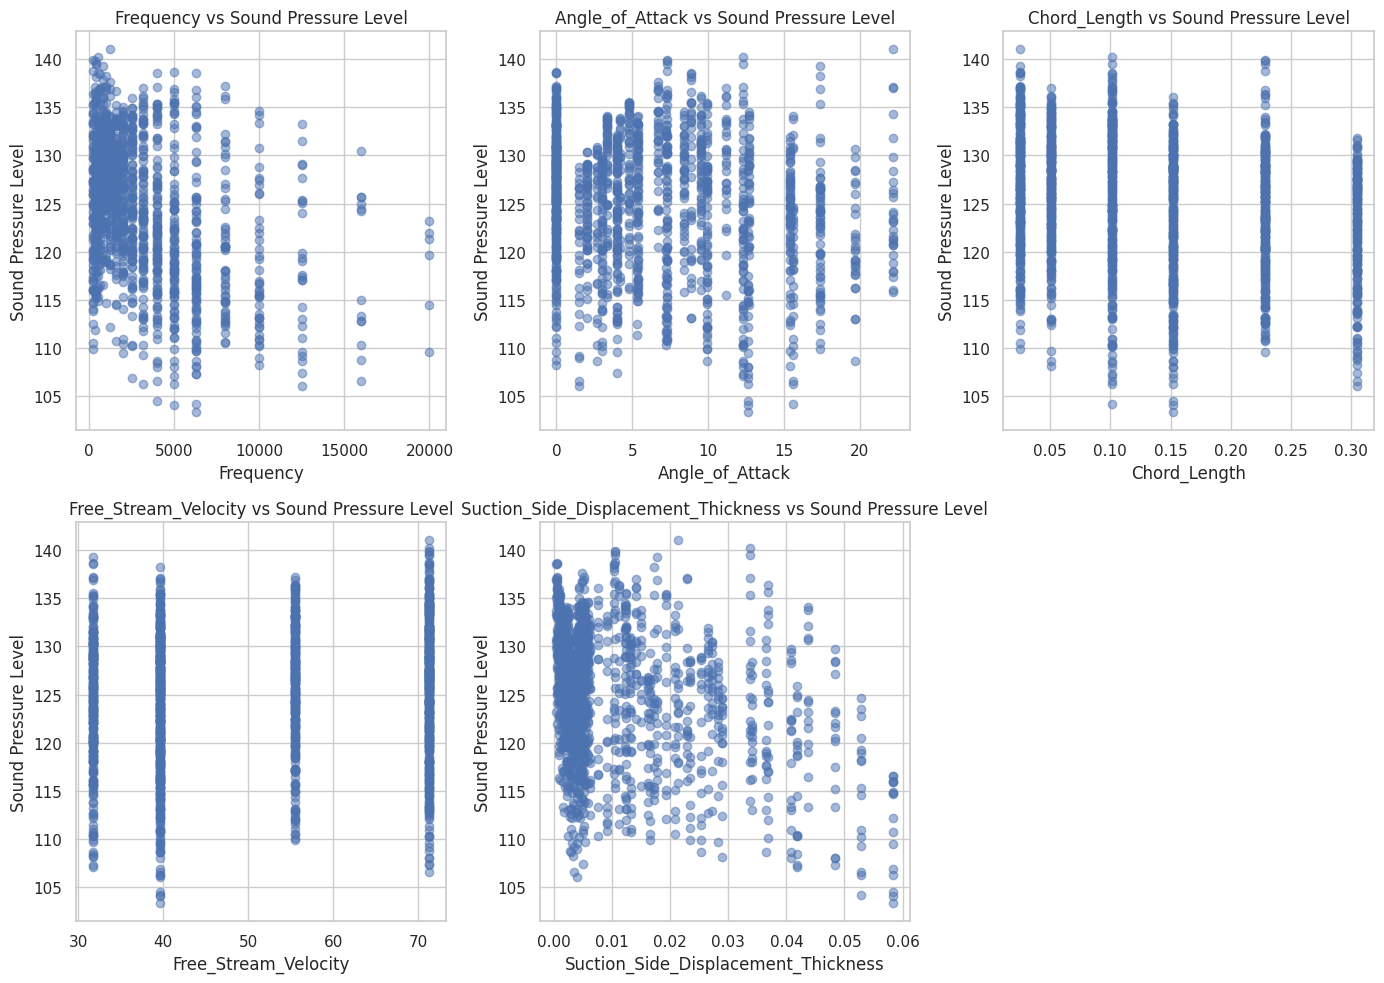

In [31]:
# Scatter plots: Relationship between features and target
plt.figure(figsize=(14,10))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 3, i)
    plt.scatter(df[col], df['Sound_Pressure_Level'], alpha=0.5)
    plt.title(f'{col} vs Sound Pressure Level')
    plt.xlabel(col)
    plt.ylabel('Sound Pressure Level')
plt.tight_layout()
plt.show()


## Correlation Analysis

Correlation matrices and heatmaps help us quantify the linear relationship between variables.


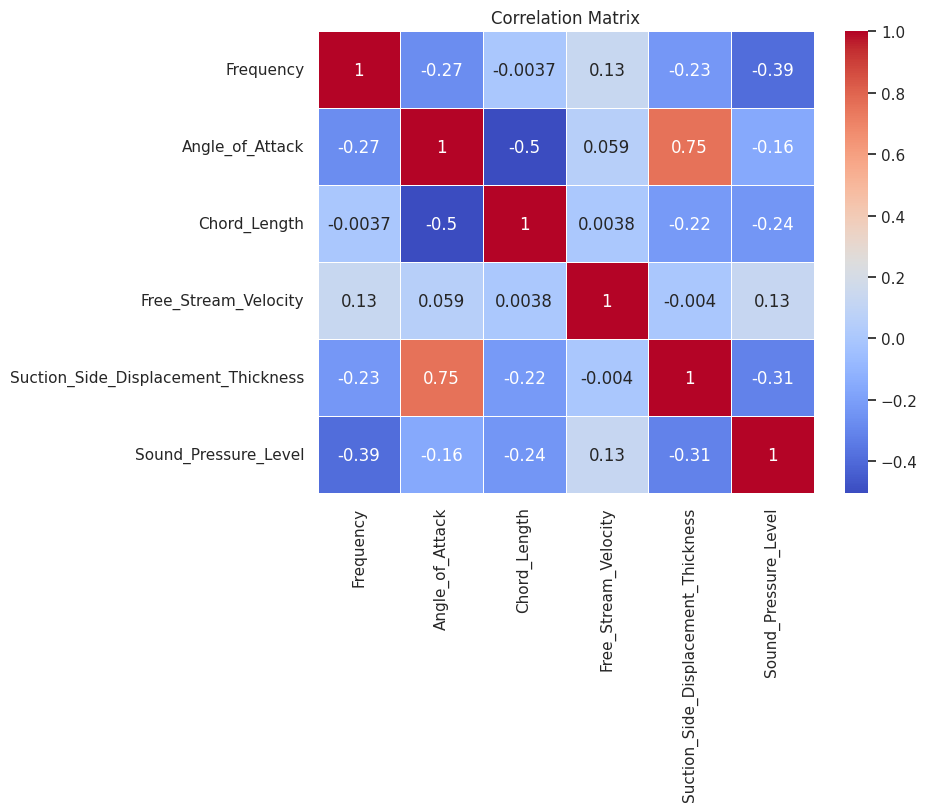

In [32]:
# Correlation matrix and heatmap
corr_matrix = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## Handling Missing Values and Inconsistent Data

Even though this dataset has no missing values, let's simulate and handle them to understand the process.


In [33]:
# Simulate missing values for demonstration
df_noisy = df.copy()
# Introduce missing values randomly in 5% of the rows for column 'Chord_Length'
np.random.seed(42)
missing_indices = np.random.choice(df_noisy.index, size=int(0.05 * len(df_noisy)), replace=False)
df_noisy.loc[missing_indices, 'Chord_Length'] = np.nan

print("Missing values in 'Chord_Length':")
print(df_noisy['Chord_Length'].isnull().sum())

# Handling missing values: Fill with mean
df_noisy['Chord_Length'].fillna(df_noisy['Chord_Length'].mean(), inplace=True)
print("Missing values after imputation:", df_noisy['Chord_Length'].isnull().sum())


Missing values in 'Chord_Length':
75
Missing values after imputation: 0


## Outlier Detection and Handling

Outliers can distort statistical analysis. We'll detect outliers using the Z-score method and handle them by capping.


Number of outliers (any feature with Z-score > 3): Frequency                              44
Angle_of_Attack                         0
Chord_Length                            0
Free_Stream_Velocity                    0
Suction_Side_Displacement_Thickness    32
Sound_Pressure_Level                    2
dtype: int64
Number of outliers in 'Frequency': 44


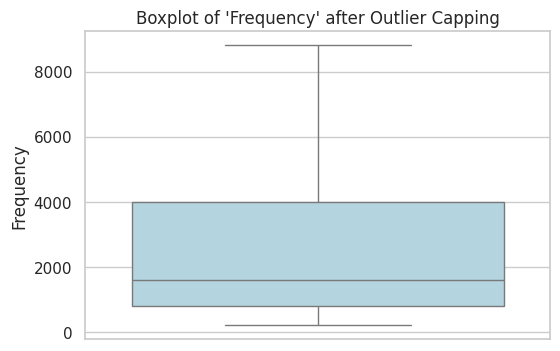

In [34]:
# Outlier detection using Z-score
z_scores = np.abs(zscore(df))
print("Number of outliers (any feature with Z-score > 3):", (z_scores > 3).sum())

# Identify outliers in 'Frequency'
outlier_condition = np.abs(zscore(df['Frequency'])) > 3
print("Number of outliers in 'Frequency':", outlier_condition.sum())

# Cap outliers in 'Frequency' using IQR method
Q1 = df['Frequency'].quantile(0.25)
Q3 = df['Frequency'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Frequency'] = np.where(df['Frequency'] > upper_bound, upper_bound,
                           np.where(df['Frequency'] < lower_bound, lower_bound, df['Frequency']))

plt.figure(figsize=(6, 4))
sns.boxplot(df['Frequency'], color='lightblue')
plt.title("Boxplot of 'Frequency' after Outlier Capping")
plt.show()


## Feature Engineering

We'll create a new feature to capture interaction effects. For instance, multiplying 'Frequency' and 'Angle_of_Attack' might reveal interesting insights.


In [35]:
# Creating a new feature
df['Freq_AoA_Interaction'] = df['Frequency'] * df['Angle_of_Attack']
print("First 5 rows with new feature:")
display(df.head())


First 5 rows with new feature:


,Frequency,Angle_of_Attack,Chord_Length,Free_Stream_Velocity,Suction_Side_Displacement_Thickness,Sound_Pressure_Level,Freq_AoA_Interaction
0,800.0,0.0,0.3048,71.3,0.002663,126.201,0.0
1,1000.0,0.0,0.3048,71.3,0.002663,125.201,0.0
2,1250.0,0.0,0.3048,71.3,0.002663,125.951,0.0
3,1600.0,0.0,0.3048,71.3,0.002663,127.591,0.0
4,2000.0,0.0,0.3048,71.3,0.002663,127.461,0.0


## Final Data Visualization

Let's visualize the effects of our preprocessing steps using Seaborn's advanced plots.


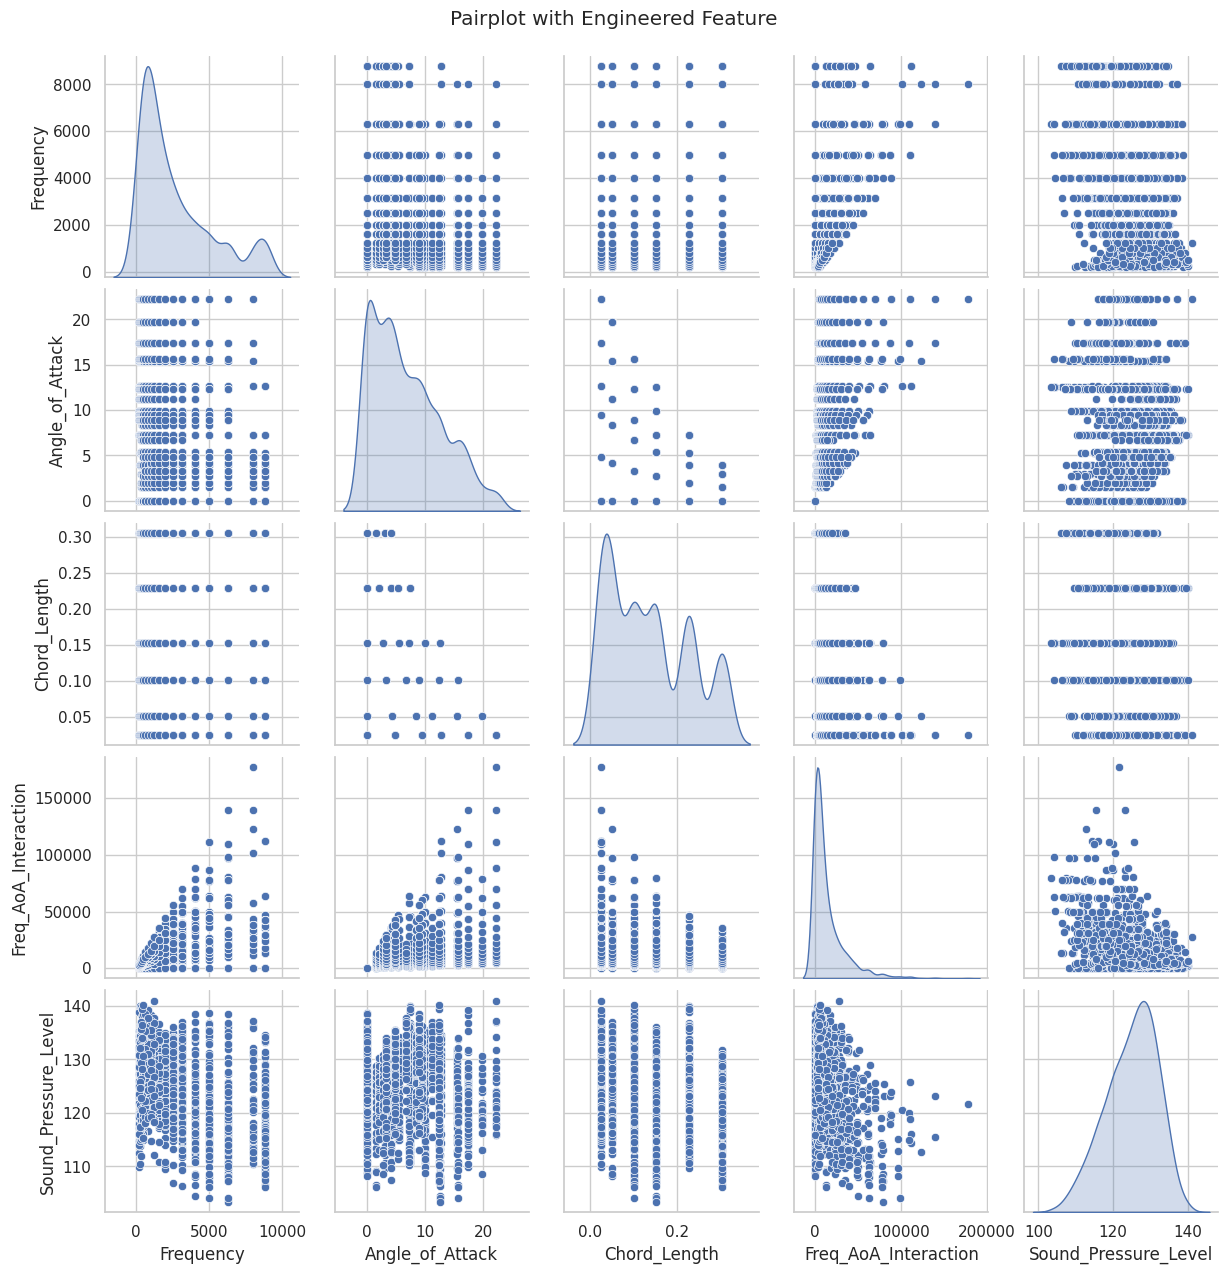

In [36]:
# Enhanced pairplot with the engineered feature
sns.pairplot(df[['Frequency', 'Angle_of_Attack', 'Chord_Length', 'Freq_AoA_Interaction', 'Sound_Pressure_Level']],
             diag_kind='kde')
plt.suptitle('Pairplot with Engineered Feature', y=1.02)
plt.show()


## Conclusion

In this lecture, we performed an extensive EDA on the noisy Airfoil Self-Noise dataset:
- **Loaded and inspected the data** to understand its structure.
- **Visualized data distributions** using histograms, boxplots, and scatter plots.
- **Analyzed correlations** with a heatmap.
- **Simulated missing values** and handled them through imputation.
- **Detected and handled outliers** using the Z-score and IQR methods.
- **Engineered a new feature** to capture interaction effects.
  
These steps provide a solid foundation for further analysis and modeling. For more details, refer to the official documentation for [pandas](https://pandas.pydata.org/), [matplotlib](https://matplotlib.org/), and [seaborn](https://seaborn.pydata.org/).

Happy coding!
